# 연습2

## 1. 분류분석

### 1-1. 각 변수들과 churn을 이용하여 시각화한 후 해석하시오.

In [210]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [211]:
data = pd.read_csv('telecom_users.csv')

In [212]:
data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [214]:
data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [215]:
data['Churn'] = [1 if x == 'Yes' else 0 for x in data['Churn']]

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [217]:
obj_cols = data.columns[data.dtypes == object]

In [218]:
for c in obj_cols :
    print(f'{c}의 종류 수는 {data[c].nunique()}')

customerID의 종류 수는 5986
gender의 종류 수는 2
Partner의 종류 수는 2
Dependents의 종류 수는 2
PhoneService의 종류 수는 2
MultipleLines의 종류 수는 3
InternetService의 종류 수는 3
OnlineSecurity의 종류 수는 3
OnlineBackup의 종류 수는 3
DeviceProtection의 종류 수는 3
TechSupport의 종류 수는 3
StreamingTV의 종류 수는 3
StreamingMovies의 종류 수는 3
Contract의 종류 수는 3
PaperlessBilling의 종류 수는 2
PaymentMethod의 종류 수는 4
TotalCharges의 종류 수는 5611


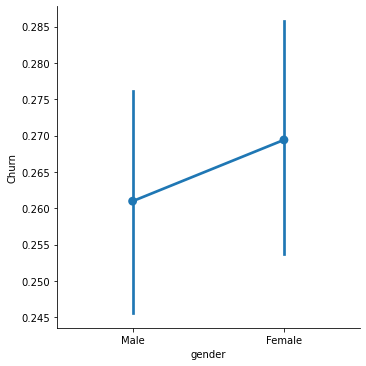

In [219]:
sns.catplot(data['gender'], data['Churn'], data = data, kind = 'point')
plt.show()

성별에 따라 이탈 여부를 시각화한 결과 여성이 남성 보다 이탈 확률이 상대적으로 높은 것으로 나타났다.

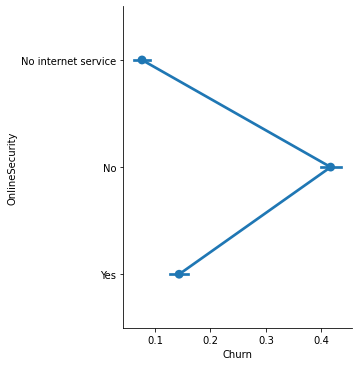

In [220]:
sns.catplot(y = data['OnlineSecurity'], x = data['Churn'], data = data, kind = 'point')
plt.show()

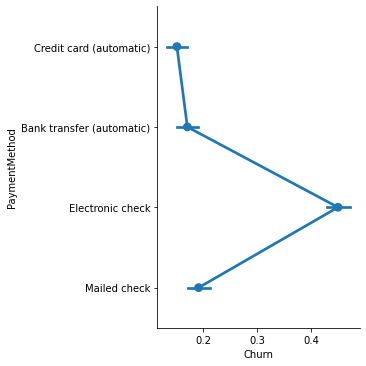

In [221]:
sns.catplot(y = data['PaymentMethod'], x = data['Churn'], data = data, kind = 'point')
plt.show()

지불 방식에 따른 이탈확률은 전자 결제의 경우 다른 방식보다 상대적으로 높은 것으로 나타났다.

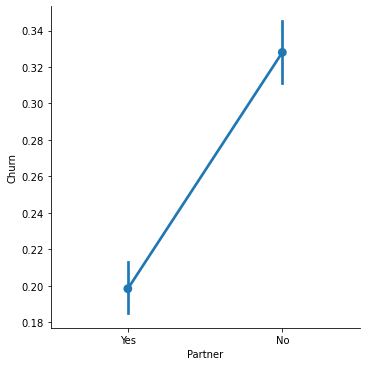

In [222]:
sns.catplot(data['Partner'], data['Churn'], data = data, kind = 'point')
plt.show()

파트너 여부에 따라 이탈 확률 차이가 성별에 따른 차이 보다 큰 것을 확인할 수 있다.

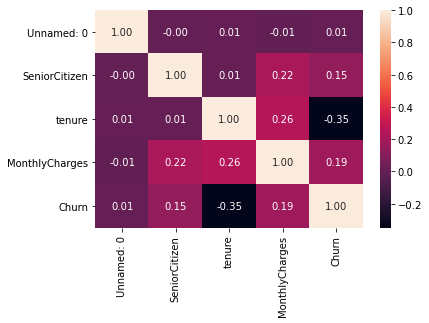

In [223]:
sns.heatmap(data.corr(), annot = True, fmt='.2f')
plt.show()

tenure과 churn은 음의 상관관계를 띄고 있는 것을 알 수 있다.

## 2. Feature Engineering 수행 (군집분석도 꼭 수행)

In [224]:
data[data['TotalCharges'] == ' ']

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,0
634,1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
2771,3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
3086,5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
3255,3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
4326,936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
5375,753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
5382,4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5695,488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
5951,1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0


TotalCharges 변수의 경우 공백 값이 들어가 있으므로 0으로 바꿔준다.

In [225]:
data['TotalCharges'] = [0 if x == ' ' else float(x) for x in data['TotalCharges']]

binary categorical feature의 경우 더미화가 아닌 0,1로 binary encoding을 수행한다.

In [226]:
obj_cols = data.columns[data.dtypes == object]

In [227]:
for c in obj_cols :
    print(f'{c}의 종류 수는 {data[c].unique()}')

customerID의 종류 수는 ['7010-BRBUU' '9688-YGXVR' '9286-DOJGF' ... '8044-BGWPI' '7450-NWRTR'
 '4795-UXVCJ']
gender의 종류 수는 ['Male' 'Female']
Partner의 종류 수는 ['Yes' 'No']
Dependents의 종류 수는 ['Yes' 'No']
PhoneService의 종류 수는 ['Yes' 'No']
MultipleLines의 종류 수는 ['Yes' 'No' 'No phone service']
InternetService의 종류 수는 ['No' 'Fiber optic' 'DSL']
OnlineSecurity의 종류 수는 ['No internet service' 'No' 'Yes']
OnlineBackup의 종류 수는 ['No internet service' 'Yes' 'No']
DeviceProtection의 종류 수는 ['No internet service' 'Yes' 'No']
TechSupport의 종류 수는 ['No internet service' 'No' 'Yes']
StreamingTV의 종류 수는 ['No internet service' 'Yes' 'No']
StreamingMovies의 종류 수는 ['No internet service' 'No' 'Yes']
Contract의 종류 수는 ['Two year' 'Month-to-month' 'One year']
PaperlessBilling의 종류 수는 ['No' 'Yes']
PaymentMethod의 종류 수는 ['Credit card (automatic)' 'Bank transfer (automatic)' 'Electronic check'
 'Mailed check']


In [228]:
data['gender'] = [1 if x == 'Male' else 0 for x in data.gender]
data['Partner'] = [1 if x == 'Yes' else 0 for x in data.Partner]
data['Dependents'] = [1 if x == 'Yes' else 0 for x in data.Dependents]
data['PhoneService'] = [1 if x == 'Yes' else 0 for x in data.PhoneService]
data['PaperlessBilling'] = [1 if x == 'Yes' else 0 for x in data.PaperlessBilling]

In [229]:
from scipy.stats import chisquare, chi2_contingency

In [230]:
obj_cols = data.columns[data.dtypes == object]

In [231]:
for c in obj_cols[1:] :
    print(f'##### {c} #####')
    ct = pd.crosstab(data[c], data.Churn)
    chi_2, p, dof, expected = chi2_contingency(ct)
    print(f'{c}의 독립성 검정 결과 유의확률은 {p}이다. \n')

##### MultipleLines #####
MultipleLines의 독립성 검정 결과 유의확률은 0.019144065337666494이다. 

##### InternetService #####
InternetService의 독립성 검정 결과 유의확률은 3.451874563052055e-130이다. 

##### OnlineSecurity #####
OnlineSecurity의 독립성 검정 결과 유의확률은 3.60686653344072e-156이다. 

##### OnlineBackup #####
OnlineBackup의 독립성 검정 결과 유의확률은 3.2003444505960775e-109이다. 

##### DeviceProtection #####
DeviceProtection의 독립성 검정 결과 유의확률은 2.808212905679805e-102이다. 

##### TechSupport #####
TechSupport의 독립성 검정 결과 유의확률은 5.608628974574772e-148이다. 

##### StreamingTV #####
StreamingTV의 독립성 검정 결과 유의확률은 1.5756554547823524e-67이다. 

##### StreamingMovies #####
StreamingMovies의 독립성 검정 결과 유의확률은 8.160493002875635e-68이다. 

##### Contract #####
Contract의 독립성 검정 결과 유의확률은 1.4563830453693763e-218이다. 

##### PaymentMethod #####
PaymentMethod의 독립성 검정 결과 유의확률은 3.623648567257548e-115이다. 



모든 변수가 통계적으로 독립성이 유의하기 때문에 더미화를 시킨후 진행한다.

In [232]:
data = pd.get_dummies(columns = obj_cols[1:], data = data).iloc[:, 2:]

## 3. Logistic Regression과 XGB를 이용하여 모델링을 하시오

In [233]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

In [234]:
data['Churn'].value_counts()

0    4399
1    1587
Name: Churn, dtype: int64

In [235]:
X = data.drop('Churn', axis = 1)
y = data.Churn

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 601, stratify = y)

LogisticRegression

In [237]:
lr_clf = LogisticRegression()

In [238]:
lr_clf.fit(X_train, y_train)

LogisticRegression()

In [239]:
lr_pred = lr_clf.predict_proba(X_test)[:, 1]

In [240]:
print(f'{lr_clf.__class__.__name__}의 roc auc score는 {roc_auc_score(y_test, lr_pred)}')

LogisticRegression의 roc auc score는 0.8413754288164664


XGBoost

In [241]:
xgb = XGBClassifier(random_state = 601)

In [242]:
xgb.fit(X_train, y_train)

[20:59:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=601,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [243]:
xgb_pred = xgb.predict_proba(X_test)[:, 1]

In [244]:
print(f'{xgb.__class__.__name__}의 roc auc score는 {roc_auc_score(y_test, xgb_pred)}')

XGBClassifier의 roc auc score는 0.8248088193253288


### 5. Logistic Regression과 XGBoost의 Feature Importacne 시각화

In [245]:
lr_fi = pd.DataFrame(lr_clf.coef_.T, index = X.columns)
lr_fi.rename(columns = {0 : 'importance'}, inplace = True)

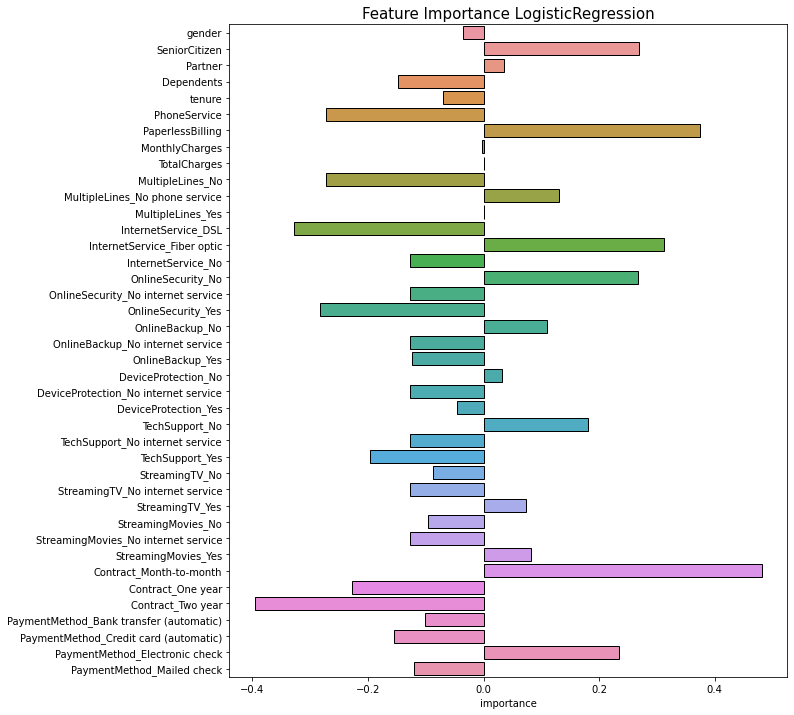

In [246]:
plt.figure(figsize = (10, 12))
sns.barplot(y = lr_fi.index, x = lr_fi.importance, edgecolor = (0, 0, 0))
plt.title(f'Feature Importance {lr_clf.__class__.__name__}', size = 15)
plt.show()

In [247]:
xgb_fi = pd.DataFrame(xgb.feature_importances_, index = X.columns)
xgb_fi.rename(columns = {0 : 'importance'}, inplace = True)

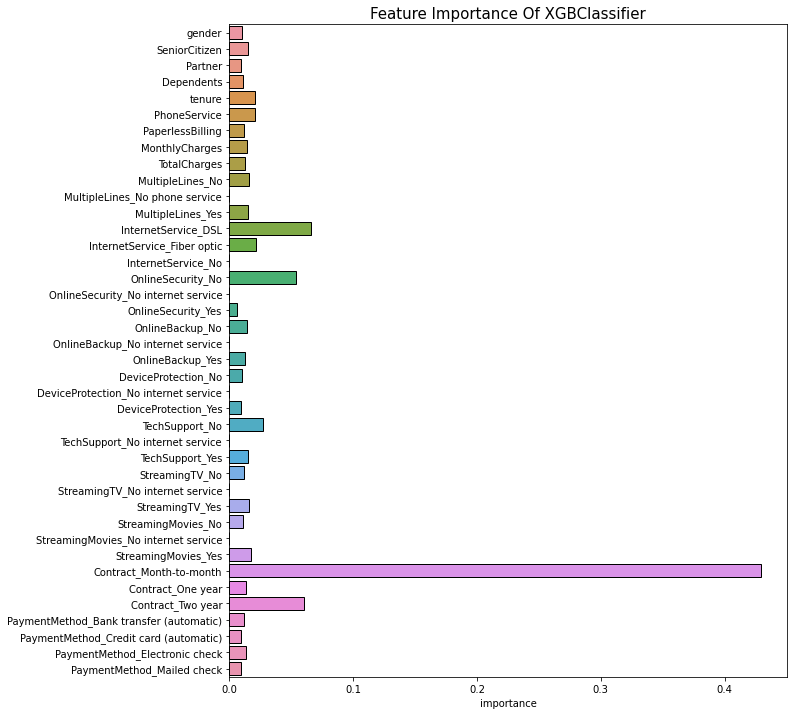

In [248]:
plt.figure(figsize = (10, 12))
sns.barplot(y = xgb_fi.index, x = xgb_fi.importance, edgecolor = (0, 0, 0))
plt.title(f'Feature Importance Of {xgb.__class__.__name__}', size = 15)
plt.show()

***
## 2. 통계분석

### 2-1. 독일과 프랑스 지역 추출해서 구매 규모 값 구하시오

In [249]:
from scipy.stats import ranksums, wilcoxon, ks_2samp, ttest_1samp, shapiro, ttest_ind, ttest_rel, ttest_ind, bartlett, levene, anderson

In [250]:
data = pd.read_csv('Online Retail2.csv')

In [251]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 8:26,3.39,17850.0,United Kingdom


In [252]:
g = data[data.Country == 'Germany']
f = data[data.Country == 'France']

In [253]:
g['구매규모'] = g.UnitPrice * g.Quantity
f['구매규모'] = f.UnitPrice * f.Quantity

In [255]:
import numpy as np

In [256]:
g_v = np.sum(g.UnitPrice * g.Quantity)
f_v = np.sum(f.UnitPrice * f.Quantity)

In [257]:
print(f'독일 구매 규모는 {g_v}')
print(f'프랑스 구매 규모는 {f_v}')

독일 구매 규모는 221698.21
프랑스 구매 규모는 197403.9


### 2. 프랑스 & 독일 데이터가 t-test 검증 가정 만족하는지 분석하시오

In [258]:
anderson(g.구매규모, dist = 'norm')

AndersonResult(statistic=1365.3438375853475, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

독일의 구매 규모는 정규성을 만족하지 못한다.

In [259]:
anderson(f.구매규모, dist = 'norm')

AndersonResult(statistic=2356.945940131216, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

프랑스 또한 정규성을 만족하지 못한다.

In [260]:
levene(g.Quantity, f.Quantity)

LeveneResult(statistic=2.4787320703388986, pvalue=0.11541277130820748)

bartlett은 데이터의 정규성 가정이 만족된 경우 사용하므로 levene 검정을 수행한다. 등분산 검정 결과 유의확률이 0.1f로 유의수준 보다 높기 때문에 등분산을 만족한다고 할 수 있다.

### 3. T-test 중 어떤 test를 해야하는지 이유를 적고, t-test의 가설검정을 적으시오

T-test 중 두 집단의 값을 비교하는 것이기 때문에 독립표본 t-검정을 수행한다. 두 집단 모두 데이터가 정규성을 만족하지 못하고 있기 때문에 윌콕슨의 순위합 검정을 수행한다. 가설검정은 다음과 같이 한다.

- 귀무가설 : 프랑스의 구매 규모와 독일의 구매 규모의 평균은 같다.
- 대립가설 : 프랑스의 구매 규모와 독일의 구매 규모의 평균은 다르다.

### 4. T-test 후 결과 값 해석하시오

In [261]:
wr = ranksums(g.구매규모, f.구매규모)
wr

RanksumsResult(statistic=-0.16821273061309164, pvalue=0.8664159260697111)

순위합 검정으로 독립표본 t-검정 수행 결과 유의확률이 0.86으로 유의수준 보다 높은 것으로 나타났다. 따라서 귀무가설을 채택하고 프랑스와 독일의 구매 규모의 평균은 같다고 할 수 있고 이는 통계적으로 유의하다.

### 5. T-test 후 효과크기를 해야하는 이유를 적고 효과크기 해석하시오

- 영가설 검증은 아주 작은 정보만 제공한다.
- 1종 오류를 줄이고자 하는 노력은 결국 검증력을 낮추는 결과를 가져온다.

실제 현상을 이해하기 위해서 우리가 알고 싶은 것은 단순히 영가설의 기각 여부가 아니라 얼마만큼의 효과와 신뢰도가 있는지이다. 따라서 영가설 검증과 더불어 효과 크기 또한 모두 고려되어야 한다.

두 집단의 평균차이를 두 집단을 합치고 그 표준편차로 나눈 값이다.
- 효과작음 : 0.2
- 효과 보통 : 0.5
- 효과 큼 : 0.8

In [262]:
t = wr.statistic
df = len(g) + len(f) - 2

In [263]:
abs(t) / np.sqrt(df)

0.0012520459210360322

효과 크기가 매우 작다고 할 수 있다.